In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv("bitext_free_dataset.csv")
df

,flags,utterance,category,intent
0,BILC,"I don't have an online account, what do I have...",ACCOUNT,create_account
1,BILQZ,can you tell me if i can regisger two accounts...,ACCOUNT,create_account
2,BPLC,"I have no online account, open one, please",ACCOUNT,create_account
3,BIPLD,"could you ask an agent how to open an account,...",ACCOUNT,create_account
4,BLQC,"i want an online account, create one",ACCOUNT,create_account
...,...,...,...,...
21529,BILQC,"i have no shipping address, what do i have to ...",SHIPPING,set_up_shipping_address
21530,BLQC,I have no shipping address and I want to set o...,SHIPPING,set_up_shipping_address
21531,BIQC,"i want to set up my shipping address, what do ...",SHIPPING,set_up_shipping_address
21532,BILC,"I don't have a shipping address, can you set o...",SHIPPING,set_up_shipping_address


In [3]:
df.category.unique()

array(['ACCOUNT', 'CANCELLATION_FEE', 'CONTACT', 'DELIVERY', 'FEEDBACK',
       'INVOICES', 'NEWSLETTER', 'ORDER', 'PAYMENT', 'REFUNDS',
       'SHIPPING'], dtype=object)

Bitext Sample Pre-built Customer Support Dataset for English
============================================================

Overview
--------
This dataset contains example utterances and their corresponding intents from the Customer Support domain. The data can be used to train intent recognition models Natural Language Understanding (NLU) platforms.

The dataset covers the "Customer Support" domain and includes 27 intents grouped in 11 categories. These intents have been selected from Bitext's collection of 20 domain-specific datasets (banking, retail, utilities...), keeping the intents that are common across domains. See below for a full list of categories and intents.

Utterances
----------
The dataset contains over 20,000 utterances, with a varying number of utterances per intent. These utterances have been extracted from a larger dataset of 288,000 utterances (approx. 10,000 per intent), including language register variations such as politeness, colloquial, swearing, indirect style... To select the utterances, we use stratified sampling to generate a dataset with a general user language register profile.

The dataset also reflects commonly ocurring linguistic phenomena of real-life chatbots, such as:
  - spelling mistakes
  - run-on words
  - missing punctuation

Contents
--------
Each entry in the dataset contains an example utterance from the Customer Support domain, along with its corresponding intent, category and additional linguistic information. Each line contains the following four fields:
  - flags: the applicable linguistic flags
  - utterance: an example user utterance
  - category: the high-level intent category
  - intent: the intent corresponding to the user utterance

Linguistic flags
----------------
The dataset contains annotations for linguistic phenomena, which can be used to adapt bot training to different user language profiles. These flags are:
  B - Basic syntactic structure
  S - Syntactic structure
  L - Lexical variation (synonyms)
  M - Morphological variation (plurals, tenses…)
  I - Interrogative structure
  C - Complex/Coordinated syntactic structure
  P - Politeness variation
  Q - Colloquial variation
  W - Offensive language
  E - Expanded abbreviations (I'm -> I am, I'd -> I would…)
  D - Indirect speech (ask an agent to…)
  Z - Noise (spelling, punctuation…)

These phenomena make the training dataset more effective and make bots more accurate and robust.

Categories and Intents
----------------------
The intent categories covered by the dataset are:
  ACCOUNT
  CANCELLATION_FEE
  CONTACT
  DELIVERY
  FEEDBACK
  INVOICES
  NEWSLETTER
  ORDER
  PAYMENT
  REFUNDS
  SHIPPING

The intents covered by the dataset are:
  cancel_order
  complaint
  contact_customer_service
  contact_human_agent
  create_account
  change_order
  change_shipping_address
  check_cancellation_fee
  check_invoices
  check_payment_methods
  check_refund_policy
  delete_account
  delivery_options
  delivery_period
  edit_account
  get_invoice
  get_refund
  newsletter_subscription
  payment_issue
  place_order
  recover_password
  registration_problems
  review
  set_up_shipping_address
  switch_account
  track_order
  track_refund

(c) Bitext Innovations, 2020



Preprocessing

In [2]:
import plotly.express as ex
ex.pie(df,names='category',title='Propotion Of Loan Status',hole=0.4)

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [4]:
def retrieve_text_labels(data, dataset_type='train'):
    """Returns list of documents and numerical labels for categories
    
    'data' must contain columns `utterance`, `category`. 

    If dataset_type=`train`, returns list of documents and list of numerical categories. 
    If dataset_type=`test`, returns list of documents without categories. 
         
    """
    # https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
    def remove_noise(text):
        #Punctuation Removal
        text = text.str.replace(r'[^\w\s]+', '')
        #Lowering the Text
        text = text.apply(lambda x: x.lower())
          #  Numbers removing
        text = text.str.replace('\d+', '')

        #text = text.str.replace("(<br/>)", "") # <br/> inserts line break
        #text = text.str.replace('(<a).*(>).*(</a>)', '') # <a href="https://www.w3schools.com">Visit W3Schools.com!</a>
        #text = text.str.replace('(&amp)', '') # &amp = '&' (and)
        #text = text.str.replace('(&gt)', '') # gt = greater than
        #text = text.str.replace('(&lt)', '') # lt = less than
        #text = text.str.replace('(\xa0)', ' ') # space
        return text
    

    if dataset_type == 'train':
        
        df.loc[:, 'utterance'] = remove_noise(df.loc[:, 'utterance'])
        
        # 
        train = data.utterance.tolist()
        # encoding
        labels = labelencoder.fit_transform(data.category).tolist()
        return train, labels
    
    else:
        df.loc[:, 'utterance'] = remove_noise(df.loc[:, 'utterance'])
        train = data.utterance.tolist()
        return train

In [4]:
def retrieve_text_labels(data):
    """Returns list of documents and numerical labels for categories
    
    'data' must contain columns `utterance`, `category`. 
      
    """
    # https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
    def remove_noise(text):
        #Punctuation Removal
        text = text.str.replace(r'[^\w\s]+', '')
        #Lowering the Text
        text = text.apply(lambda x: x.lower())
          #  Numbers removing
        text = text.str.replace('\d+', '')

        #text = text.str.replace("(<br/>)", "") # <br/> inserts line break
        #text = text.str.replace('(<a).*(>).*(</a>)', '') # <a href="https://www.w3schools.com">Visit W3Schools.com!</a>
        #text = text.str.replace('(&amp)', '') # &amp = '&' (and)
        #text = text.str.replace('(&gt)', '') # gt = greater than
        #text = text.str.replace('(&lt)', '') # lt = less than
        #text = text.str.replace('(\xa0)', ' ') # space
        return text
    

    data.loc[:, 'utterance'] = remove_noise(data.loc[:, 'utterance'])
        
        # 
    data_train = data.utterance.tolist()
        # encoding
    labels = labelencoder.fit_transform(data.category).tolist()
    return data_train, labels

In [5]:
news_train, labels = retrieve_text_labels(df)
labels = np.array(labels)

C:\Users\teshe\AppData\Local\Temp\ipykernel_12156\199836841.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace(r'[^\w\s]+', '')
C:\Users\teshe\AppData\Local\Temp\ipykernel_12156\199836841.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\d+', '')


In [27]:
labels

array([ 0,  0,  0, ..., 10, 10, 10])

In [18]:
news_train

['i dont have an online account what do i have to do to register',
 'can you tell me if i can regisger two accounts with a single email address',
 'i have no online account open one please',
 'could you ask an agent how to open an account please',
 'i want an online account create one',
 'i want an account i need help opening one',
 'tell me if i can register  two online accounts with the same email',
 'i want to know if i could create two profiles with the same email address',
 'can you tell me if i can create more than one fucking user account with the same email',
 'were to create an onlind account',
 'i wanna know if i can create more than one user account with a single email address',
 'can i create two online accounts with a single email',
 'i dont have a user account how do i create one',
 'i have no user account what do i have to do to create one',
 'i want to know if i can own several accounts',
 'i dont have a profile  can i creae one',
 'i dont have an online account i need 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

### 4.1 Custom tokenizers using `spaCy` 

In [7]:
nlp = spacy.load("en_core_web_md")

In [8]:
def wrong_token(token):
    """Filters token based on POS-tag"""
    
    wrong_pos = token.pos_ in ['SPACE', 'PUNCT', 'X', 'NUM', 'SYM', 'DET', 'PART', 'INTJ']
    personal_pronoun = (token.lemma_ == '-PRON-')
    
    return personal_pronoun or wrong_pos

In [9]:
from nltk.corpus import stopwords

In [10]:
def spacy_tokenizer(data, n_process=4, pos=True, stop_words=True):
    """Tokenizes the data using spaCy. If pos=True, returns POS-tags too.

    Args:
        data (List): List of documents
        n_process (int): number of processes to run .pipe method of spaCy object
        pos (bool): if True, returns POS-tags too
        stop_words (bool): if True, remove stop words using NLTK Stopwords list

    Returns:
        List: List of lemmatized tokens
        List: List of POS-tags if pos=True
    """
    nlp = spacy.load("en_core_web_md")

    if stop_words == True:
        nltk_stopwords = stopwords.words("English")

    if spacy.__version__ < "2.2.2":
        data_gen = nlp.pipe(data, n_threads=n_process)
    else:
        data_gen = nlp.pipe(data, n_process=n_process)

    data_lemma = []

    if pos == True:
        data_pos = []

    for token_objects in data_gen:

        lemma_tokens = [
            token.lemma_.lower().strip()
            for token in token_objects
            if not wrong_token(token)
        ]

        if stop_words == True:
            lemma_tokens = [
                token for token in lemma_tokens if token not in nltk_stopwords
            ]

        data_lemma.append(lemma_tokens)

        if pos == True:
            pos_tokens = [token.pos_ for token in token_objects]
            data_pos.append(pos_tokens)

    if pos:
        return data_lemma, data_pos
    else:
        return data_lemma

In [11]:
news_train_lemma, news_train_pos = spacy_tokenizer(news_train)

In [20]:
len(news_train_lemma)

21534

In [21]:
len(news_train_pos)

21534

# EDA

In [33]:
def plot_fake_real_diff(tokenized_data, method='tfidf', ngram_range=(1,1), max_features=50, figsize=(20,5), remove_xticks=True, title=None):
    """Plots grouped bar plot, showing the difference in tokens used between REAL and FAKE news.
    
    Args:
        tokenized_data: List of tokens
        method: type of vectorizer to use, either
    
    """
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=ngram_range, 
                                     tokenizer=lambda doc: doc, 
                                     preprocessor=lambda doc:doc, 
                                     max_features=max_features)
    elif method == 'count':
        vectorizer = CountVectorizer(ngram_range=ngram_range, 
                                     tokenizer=lambda doc: doc, 
                                     preprocessor=lambda doc:doc, 
                                     max_features=max_features)
    else:
        print("Choose either 'tfidf' for TfidfVectorizer or 'count' for CountVectorizer.")
        return None
        
    document_matrix = vectorizer.fit_transform(tokenized_data)
    document_matrix = pd.DataFrame(document_matrix.A, columns = vectorizer.get_feature_names())
    

    ACCOUNT = document_matrix.assign(label=labels).groupby('label').sum().iloc[0] / sum(labels == 0)
    CANCELLATION_FEE = document_matrix.assign(label=labels).groupby('label').sum().iloc[1] / sum(labels == 1)
    CONTACT = document_matrix.assign(label=labels).groupby('label').sum().iloc[2] / sum(labels == 2)
    DELIVERY = document_matrix.assign(label=labels).groupby('label').sum().iloc[3] / sum(labels == 3)
    FEEDBACK = document_matrix.assign(label=labels).groupby('label').sum().iloc[4] / sum(labels == 4)
    INVOICES = document_matrix.assign(label=labels).groupby('label').sum().iloc[5] / sum(labels == 5)
    NEWSLETTER = document_matrix.assign(label=labels).groupby('label').sum().iloc[6] / sum(labels == 6)
    ORDER = document_matrix.assign(label=labels).groupby('label').sum().iloc[7] / sum(labels == 7)
    PAYMENT = document_matrix.assign(label=labels).groupby('label').sum().iloc[8] / sum(labels == 8)
    REFUNDS = document_matrix.assign(label=labels).groupby('label').sum().iloc[9] / sum(labels == 9)
    SHIPPING = document_matrix.assign(label=labels).groupby('label').sum().iloc[10] / sum(labels == 10)

    index = document_matrix.assign(label=labels).groupby('label').sum().columns
    
    plt.style.use('seaborn-talk')
    
    pd.DataFrame({'acc': ACCOUNT,'fee': CANCELLATION_FEE,'cont':CONTACT,'del': DELIVERY,'feed': FEEDBACK,'inv': INVOICES,'news': NEWSLETTER,
                  'ord': ORDER,'pay': PAYMENT,'ref': REFUNDS,'ship': SHIPPING}, index=index).plot.bar(rot=90, figsize=figsize)

    if remove_xticks == True:
        plt.xticks([])
    
    plt.title(title)
        
    plt.savefig(title + '.png', bbox_inches = "tight")
    
    plt.show()

c:\Users\teshe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


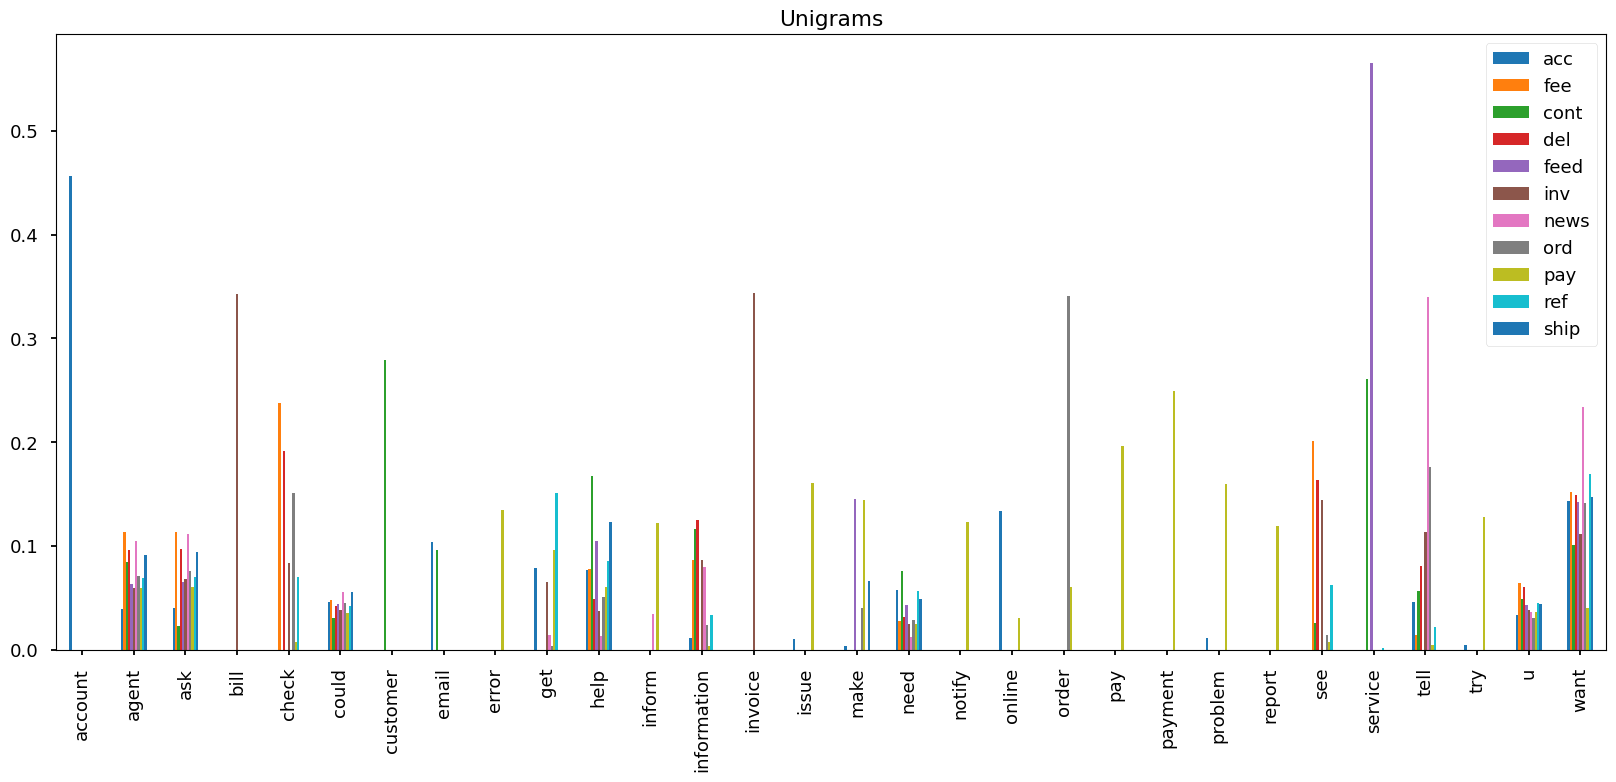

In [40]:
plot_fake_real_diff(news_train_lemma, method='tfidf', ngram_range=(1,1), max_features=30, remove_xticks=False, figsize=(20,8), title='Unigrams')

c:\Users\teshe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


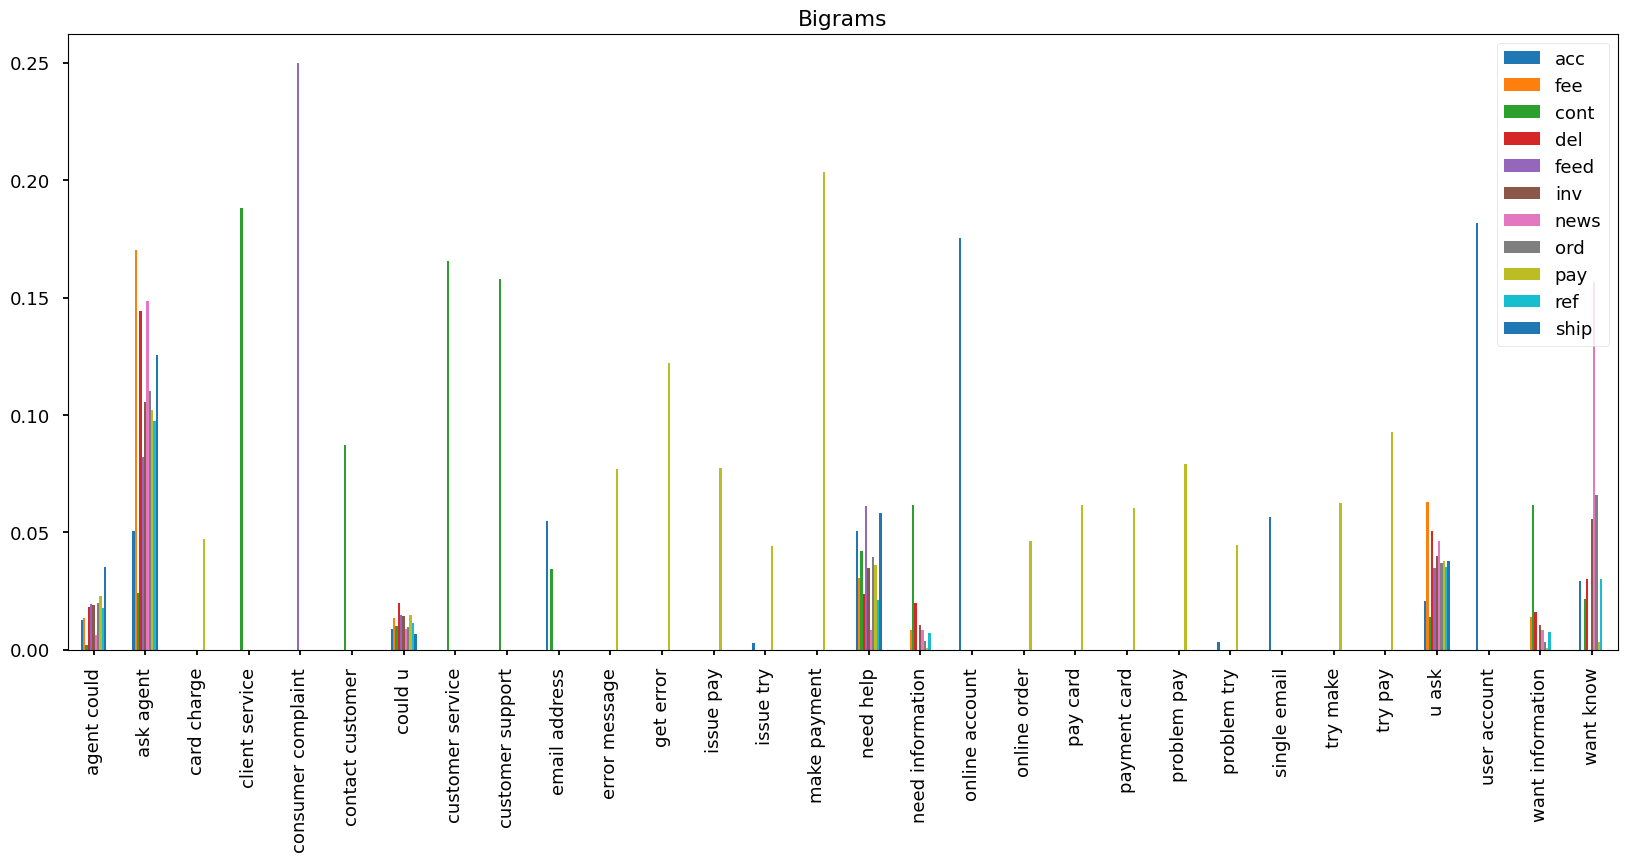

In [41]:
plot_fake_real_diff(news_train_lemma, method='tfidf', ngram_range=(2,2), max_features=30, remove_xticks=False, figsize=(20,8), title='Bigrams')

## 5. Modeling <a id=modeling>

The approach for the modeling would be the following:
1. Start with creating a classification model using only TF-IDF matrix based on unigrams. 
2. Create a model using bigrams. 
3. Combine unigrams and bigrams and see if the model improves.
4. Build model based on POS-tagging based document-term matrix and combine POS-tagging doc matrix to see if the model improves.

**Below there are custom functions for modelling to speed up experimentation.**

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [12]:
f1 = make_scorer(f1_score , average='macro')

In [20]:
def run_experiment(X, y, algorithm, max_features_options=['None'], ngram_range=(1,1), input_type='raw'):
    """Returns the table with cross-validated accuracies for different max_features values and best hyperparameters
    
    Args:
        X: List of documents
        y: labels
        algorithm: algorithm to run, 'NB' for Multinomial Naive Bayes, 'SGD' for SGDClassifier, 'KNN' for K-Nearest Neighbors
        max_features_options: List of values of max_features, used in TfidfVectorizer
        ngram_range: keyword argument of TfidfVectorizer
        input_type: if 'raw', List of document is expected; if 'prepared' the document-term matrix is expected
    
    Returns:
        DataFrame: scores_table, mean and std of the best accuracy scores
        Dict: dictionary of the best hyperparameters, where keys are in the format (algorithm, max_features)
    """
    
    best_params_dict = {}
    scores_table = {'algorithm':[], 'tfidf_max_features':[], 'best_score':[]}
    
    for max_features in max_features_options:
        
        best_score, best_params = train_clf(
            X=X, 
            y=y, 
            algorithm=algorithm, 
            max_features=max_features, 
            ngram_range=ngram_range, 
            input_type=input_type
        )
    
        best_params_dict[(algorithm, max_features)] = best_params
    
        scores_table['algorithm'].append(algorithm)
        scores_table['tfidf_max_features'].append(max_features)
        scores_table['best_score'].append(best_score)
        
    return pd.DataFrame(scores_table), best_params_dict


def train_clf(X, y, algorithm, max_features=1000, ngram_range=(1,1), input_type='raw'):
    """Returns the best accuracy score (mean and std), the best hyperparameters and preprocessed data based on Grid Search
    
    Args:
        X: List of documents
        y: labels
        algorithm: name of the algorithm, one of the following 'NB' (Naive Bayes), 'SGD' (SGDClassifier), 'SVM' (Linear SVM)
        max_features: keyword argument of TfidfVectorizer
        ngram_range: keyword argument of TfidfVectorizer
        input_type: if 'raw', List of document is expected; if 'prepared' the document-term matrix is expected
        
    Returns:
        Float: the mean value of the accuracy of the best model
        Float: the std value of the accuracy of the best model
        Dict: dictionary of the best hyperparameters
    """
    
    if input_type == 'raw':
        X = preprocess_input(
            X=X, 
            max_features=max_features, 
            ngram_range=
            ngram_range, 
            output_type='sparse'
        )
    
    if algorithm == 'SGD':
        clf = SGDClassifier(random_state=289, penalty='elasticnet')
        param_grid = {
            'l1_ratio': [0, 0.15, 0.3, 0.45, 0.6],
            'loss': ['hinge', 'modified_huber']
        }
        
    elif algorithm == 'SVM':
        clf = LinearSVC(random_state=289, max_iter=10000)
        param_grid = {
            'C': [0.1, 0.3, 1, 3, 10, 30],
            'loss': ['hinge', 'squared_hinge']
        }
        
    elif algorithm == 'NB':
        clf = MultinomialNB()
        param_grid = {
            'alpha': [0.1, 0.3, 0.5, 0.7, 1]
        }



    grid_search = GridSearchCV(
        clf, 
        cv=10,
        param_grid=param_grid, 
        n_jobs=-1, 
        scoring=f1, 
        verbose=0
    ).fit(X, y)
    
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_score, best_params


def preprocess_input(X, max_features, ngram_range, output_type='sparse'):
    """Return TFIDF document-term matrix
    Args:
        X: List of documents
        max_features: keyword argument of TfidfVectorizer
        ngram_range: keyword argument of TfidfVectorizer
        output_type: 'sparse' returns sparse matrix, 'df' returns pandas DataFrame
        
    Returns:
        sparse_matrix / DataFrame: preprocessed document-term matrix
    """
    
    tfidf = TfidfVectorizer(
        ngram_range=ngram_range,
        tokenizer=lambda doc: doc, 
        preprocessor=lambda doc:doc,
        max_features=max_features
    )
    
    X = tfidf.fit_transform(X)

    if output_type == 'df':
        X = pd.DataFrame(X.A, columns=tfidf.get_feature_names())
    
    return X

### 5.1 Unigrams only - top N features

#### 5.1.1 Naive Bayes

* **The best cross-validated score**: `0.907727`
* **TfidfVectorizer's max_features**: `20 000`
* **The best hyperparameters**: `alpha = 0.1`

algorithm	|tfidf_max_features	|best_score
------------|-------------------|---------------
NB	|5000	|0.880720
NB	|10000	|0.900475
NB	|20000	|0.907727
NB	|30000	|0.905476
NB	|40000	|0.901975
NB	|None	|0.897224

In [21]:
algorithm = 'NB'
max_features_options = [5000, 10000, 20000, 30000, 40000, None]

scores_table, best_params_dict = run_experiment(
    X=news_train_lemma, 
    y=labels, 
    algorithm=algorithm, 
    max_features_options=max_features_options, 
    ngram_range=(1,1), 
    input_type='raw'
)

In [19]:
scores_table

,algorithm,tfidf_max_features,best_score
0,NB,5000.0,NaN
1,NB,10000.0,NaN
2,NB,20000.0,NaN
3,NB,30000.0,NaN
4,NB,40000.0,NaN
5,NB,NaN,NaN


In [ ]:
print(best_params_dict[('NB', 20000)])

In [42]:
algorithm = 'SVM'
max_features_options = [20000, 40000, 60000, 80000]

scores_table, best_params_dict = run_experiment(
    X=news_train_lemma, 
    y=labels, 
    algorithm=algorithm, 
    max_features_options=max_features_options, 
    ngram_range=(1,2), 
    input_type='raw'
)

In [43]:
scores_table

,algorithm,tfidf_max_features,best_score
0,SVM,20000,0.991141
1,SVM,40000,0.991141
2,SVM,60000,0.991141
3,SVM,80000,0.991141


### 5.2 Bigrams only - top N features

In [46]:
algorithm = 'NB'
max_features_options = [5000, 10000, 20000, 30000, 40000, None]

scores_table, best_params_dict = run_experiment(
    X=news_train_lemma, 
    y=labels, 
    algorithm=algorithm, 
    max_features_options=max_features_options, 
    ngram_range=(2,2), 
    input_type='raw'
)

In [47]:
scores_table

,algorithm,tfidf_max_features,best_score
0,NB,5000.0,0.966205
1,NB,10000.0,0.966205
2,NB,20000.0,0.966205
3,NB,30000.0,0.966205
4,NB,40000.0,0.966205
5,NB,NaN,0.966205


In [48]:
best_params_dict[('NB', 40000)]

{'alpha': 0.3}

### 5.3 Unigrams + Bigrams

In [49]:
algorithm = 'NB'
max_features_options = [20000, 40000, 60000, 80000]

scores_table, best_params_dict = run_experiment(
    X=news_train_lemma, 
    y=labels, 
    algorithm=algorithm, 
    max_features_options=max_features_options, 
    ngram_range=(1,2), 
    input_type='raw'
)

In [50]:
scores_table

,algorithm,tfidf_max_features,best_score
0,NB,20000,0.979069
1,NB,40000,0.979069
2,NB,60000,0.979069
3,NB,80000,0.979069


### 5.4 Unigrams + Bigrams + POS-tags

We saw that adding Bigrams features improves all models (**Naive Bayes, SVM, SGDClassifier, KNN**). Let's check if adding POS-tags improves the model too. Before we do that, let's first try to build classification model using just POS-tags and see the performance:

* **Naive Bayes**: `accuracy = 0.880220,  max_features = 20 000`
* **SVM**: `accuracy = 0.876969, max_features = 30 000`
* **SGDClassifier**: `accuracy = 0.873218, max_features = 30 000`
* **KNN**: `accuracy = 0.713178, max_features = 5 000`

In [23]:
X_pos = preprocess_input(X=news_train_pos, max_features=20000, ngram_range=(4,4), output_type='df')
X_lemma = preprocess_input(X=news_train_lemma, max_features=80000, ngram_range=(1,2), output_type='df')

X_prep = pd.concat([X_lemma, X_pos], axis=1)
X_prep

c:\Users\teshe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\teshe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa mistake,aaddress,aan,aan error,aand,aand wanna,abck,abck guarantee,abill,...,X NOUN ADP PRON,X NOUN NOUN DET,X NOUN NOUN SCONJ,X NOUN SCONJ AUX,X PART VERB ADP,X PART VERB DET,X PART VERB PRON,X PRON VERB PART,X SCONJ PART VERB,X VERB DET NOUN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.5 Final pipeline

For the final pipeline, we decided to use the last **VotingClassifier**, which gave us the best cross-validated accuracy, using combined **Unigram-Bigram** document-term matrix (`max_features = 80,000`) and **POS-tags based** document-term matrix (`max_features = 20,000`). 

In [25]:
class CustomerSupport:
    def __init__(self, max_features_lemma=80000, max_features_pos=20000):
        self.tfidf_lemma = TfidfVectorizer(
            ngram_range=(1, 2),
            tokenizer=lambda doc: doc,
            preprocessor=lambda doc: doc,
            max_features=max_features_lemma,
        )

        self.tfidf_pos = TfidfVectorizer(
            ngram_range=(4, 4),
            tokenizer=lambda doc: doc,
            preprocessor=lambda doc: doc,
            max_features=max_features_pos,
        )

    def fit(self, X_lemma, X_pos, labels=None):
        X_lemma = self.tfidf_lemma.fit_transform(X_lemma)
        X_lemma = pd.DataFrame(X_lemma.A, columns=self.tfidf_lemma.get_feature_names())

        X_pos = self.tfidf_pos.fit_transform(X_pos)
        X_pos = pd.DataFrame(X_pos.A, columns=self.tfidf_pos.get_feature_names())

        X_prep = pd.concat([X_lemma, X_pos], axis=1)

        self.model = VotingClassifier(
            estimators=[
                ("NB", MultinomialNB(alpha=0.1)),
                ("SVM", LinearSVC(C=1, random_state=289, loss="hinge")),
                ("SGD", SGDClassifier(random_state=289, loss="hinge")),
            ],
            voting="hard",
            n_jobs=-1,
        )

        self.model.fit(X_prep, labels)

    def predict(self, X_lemma, X_pos):
        X_lemma = self.tfidf_lemma.transform(X_lemma)
        X_lemma = pd.DataFrame(X_lemma.A, columns=self.tfidf_lemma.get_feature_names())

        X_pos = self.tfidf_pos.transform(X_pos)
        X_pos = pd.DataFrame(X_pos.A, columns=self.tfidf_pos.get_feature_names())

        X_prep = pd.concat([X_lemma, X_pos], axis=1)

        predictions = self.model.predict(X_prep)
        predictions = pd.Series(predictions)
        predictions = predictions.replace([0, 1, 2, 3, 4 ,5 ,6, 7,8,9,10], ["ACCOUNT","CANCELLATION_FEE","CONTACT","DELIVERY","FEEDBACK","INVOICES","NEWSLETTER",
                  "ORDER","PAYMENT","REFUNDS","SHIPPING"]).to_list()

        return predictions

    def predict_from_raw(self, news):
        news_lemma, news_pos = spacy_tokenizer(news)

        news_lemma = self.tfidf_lemma.transform(news_lemma)
        news_lemma = pd.DataFrame(
            news_lemma.A, columns=self.tfidf_lemma.get_feature_names()
        )

        news_pos = self.tfidf_pos.transform(news_pos)
        news_pos = pd.DataFrame(news_pos.A, columns=self.tfidf_pos.get_feature_names())

        news_prep = pd.concat([news_lemma, news_pos], axis=1)

        predictions = self.model.predict(news_prep)
        predictions = pd.Series(predictions)
        predictions = predictions.replace([0, 1, 2, 3, 4 ,5 ,6, 7,8,9,10], ["ACCOUNT","CANCELLATION_FEE","CONTACT","DELIVERY","FEEDBACK","INVOICES","NEWSLETTER",
                  "ORDER","PAYMENT","REFUNDS","SHIPPING"]).to_list()

        return predictions


In [ ]:
shallow_model = CustomerSupport()
shallow_model.fit(news_train_lemma, news_train_pos, labels)

In [ ]:
test_batch_predictions = shallow_model.predict(news_test_lemma, news_test_pos)

# Transformers